In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as  plt
import matplotlib.colors as mcolors

In [2]:
Mean_Kasumi1 = (pd.read_excel('/Users/sxa126/Dropbox/CAR_NK_model/CAR_NK_Python/Pareto_Opt/Pure_Mono/data/6-28-2024 Cytotox.xlsx',sheet_name=0))
Mean_Kasumi1.columns = Mean_Kasumi1.iloc[18]
Mean_Kasumi1 = (Mean_Kasumi1[18:].iloc[1:7,0:5]).reset_index(drop=True)
print(Mean_Kasumi1)
Mean_Kasumi1 = Mean_Kasumi1.iloc[:,1:5].values
mean_Kasumi1_WT,mean_Kasumi1_CAR_NK = Mean_Kasumi1[:,0].astype(np.float64),Mean_Kasumi1[:,-1].astype(np.float64)

18  ET_Ratio        WT     50% CAR    75% CAR   100% CAR
0       10:1  35.164716  42.916388  42.006192  53.762803
1        5:1  25.398535   40.63071  42.911573   42.02064
2      2.5:1  16.415856  26.418014  32.986839  31.143849
3     1.25:1  13.670079  15.029261  24.726909  20.911271
4    0.625:1   7.163119   9.812209  12.146417  10.176733
5   0.3125:1   8.416723   2.369493  14.641029   7.913652


In [3]:
Mean_Mono = (pd.read_excel('/Users/sxa126/Dropbox/CAR_NK_model/CAR_NK_Python/Pareto_Opt/Pure_Mono/data/6-28-2024 Cytotox.xlsx',sheet_name=1))
Mean_Mono.columns = Mean_Mono.iloc[18]
Mean_Mono = (Mean_Mono[18:].iloc[1:7,0:5]).reset_index(drop=True)
ET_ratio = Mean_Mono['ET_Ratio'].values
print(Mean_Mono)
Mean_Mono = Mean_Mono.iloc[:,1:5].values
mean_Mono_WT,mean_Mono_CAR_NK = Mean_Mono[:,0].astype(np.float64),Mean_Mono[:,-1].astype(np.float64)

18  ET_Ratio        WT     50% CAR    75% CAR   100% CAR
0       10:1  25.005293  68.219763  70.180778  69.155409
1        5:1  14.155201   50.79288  58.411753   56.84687
2      2.5:1  10.845107  31.740419  41.844867  43.635526
3     1.25:1   8.627823  21.638609  30.930562  30.381079
4    0.625:1   7.181691  13.181144  21.271212  21.142784
5   0.3125:1   4.462131   6.232557  13.245357  13.707169


In [4]:
ET_ratio_num = [10,5,2.5,1.25,0.625,0.3125]

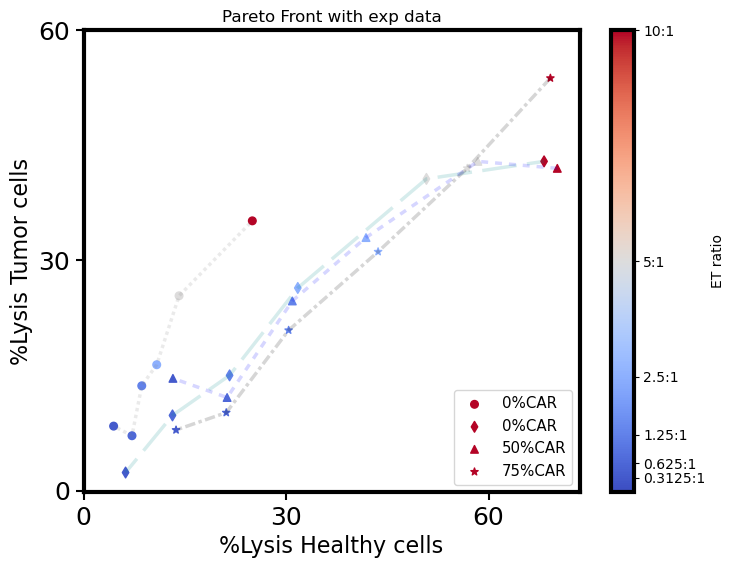

In [8]:
cmap = 'coolwarm'
norm = mcolors.Normalize(vmin=0.0, vmax=10.0)
fig,ax = plt.subplots(1,1,figsize = (8,6))
ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=18, length=6, width=1.5)
plt.rcParams['axes.linewidth'] = 3
markers = ['o','d','^','*']
colors = ['gray','darkcyan','blue','black']
labels = ['0%CAR','0%CAR','50%CAR','75%CAR','100% CAR']
ls = [(1,(1,1)),(5, (10, 3)), (0,(2,2)), (0, (3, 1, 1, 1))]
for i in range(4):
        a = Mean_Mono[:,i]
        b = Mean_Kasumi1[:,i]
        ax.plot(a,b,color=colors[i],alpha = 0.16,lw =2.5,ls = ls[i])
        sc = ax.scatter(a,b,marker=markers[i],s=30,c = ET_ratio_num,cmap=cmap,norm=norm,label = labels[i])
cbar = fig.colorbar(sc, label='ET ratio')
cbar.set_ticks(ET_ratio_num)  # Set the positions of the colorbar ticks
cbar.set_ticklabels(ET_ratio)
plt.xlabel('%Lysis Healthy cells',fontsize=16)
plt.ylabel('%Lysis Tumor cells',fontsize=16)
plt.xticks([0,30,60])
plt.yticks([0,30,60])
#ytick_labels = [r"$\frac{" + str(1) + "}{" + str(i) + "}$" for i in [round(i**-1, 1)  for i in plt.yticks()[0]]]
#plt.yticks(plt.yticks()[0], ytick_labels, fontsize =22)
plt.legend(fontsize=10.8,loc='lower right', bbox_to_anchor=(1., 0.0))
plt.title("Pareto Front with exp data")
plt.savefig('Plot_Pareto_with_data_Min_x_Max_y.png',bbox_inches='tight')
plt.show()

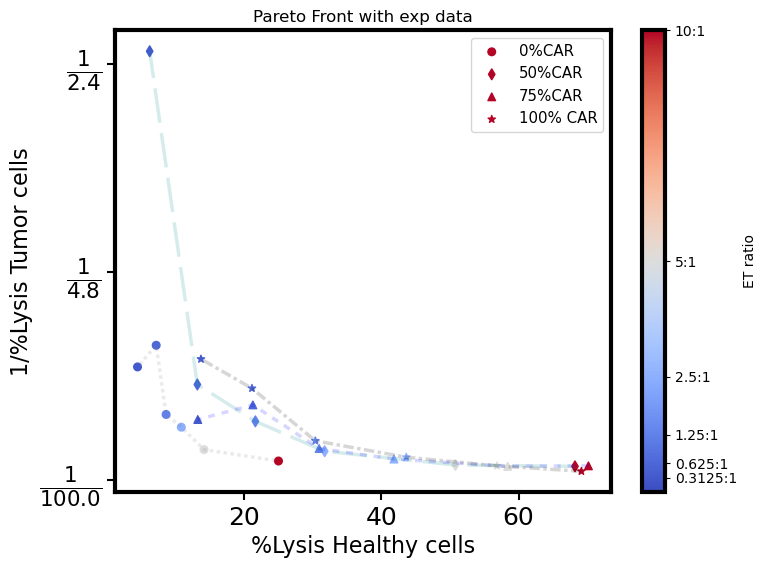

In [6]:
cmap = 'coolwarm'
norm = mcolors.Normalize(vmin=0.0, vmax=10.0)
fig,ax = plt.subplots(1,1,figsize = (8,6))
ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=18, length=6, width=1.5)
plt.rcParams['axes.linewidth'] = 3
markers = ['o','d','^','*']
colors = ['gray','darkcyan','blue','black']
labels = ['0%CAR','50%CAR','75%CAR','100% CAR']
ls = [(1,(1,1)),(5, (10, 3)), (0,(2,2)), (0, (3, 1, 1, 1))]
for i in range(4):
        a = Mean_Mono[:,i]
        b = Mean_Kasumi1[:,i]
        ax.plot(a,1/b,color=colors[i],alpha = 0.16,lw =2.5,ls = ls[i])
        sc = ax.scatter(a,1/b,marker=markers[i],s=30,c = ET_ratio_num,cmap=cmap,norm=norm,label = labels[i])
cbar = fig.colorbar(sc, label='ET ratio')
cbar.set_ticks(ET_ratio_num)  # Set the positions of the colorbar ticks
cbar.set_ticklabels(ET_ratio)
plt.xlabel('%Lysis Healthy cells',fontsize=16)
plt.ylabel('1/%Lysis Tumor cells',fontsize=16)
plt.yticks([0.01,0.21,0.41])
ytick_labels = [r"$\frac{" + str(1) + "}{" + str(i) + "}$" for i in [round(i**-1, 1)  for i in plt.yticks()[0]]]
plt.yticks(plt.yticks()[0], ytick_labels, fontsize =22)
plt.legend(fontsize=10.8,loc='upper right', bbox_to_anchor=(1., 1.0))
plt.title("Pareto Front with exp data")
plt.savefig('Plot_Pareto_with_data_Min_x_Invr_Max_y.png',bbox_inches = 'tight')
plt.show()

In [7]:
df0 = pd.read_excel('Lysis_Kasumi_Healthy_CAR_NK_frac%0.0.xlsx')
df0.sort_values(by='ET_ratio', inplace=True)
df1 = pd.read_excel('Lysis_Kasumi_Healthy_CAR_NK_frac%50.0.xlsx')
df1.sort_values(by='ET_ratio', inplace=True)
df2 = pd.read_excel('Lysis_Kasumi_Healthy_CAR_NK_frac%75.0.xlsx')
df2.sort_values(by='ET_ratio', inplace=True)
df3 = pd.read_excel('Lysis_Kasumi_Healthy_CAR_NK_frac%100.0.xlsx')
df3.sort_values(by='ET_ratio', inplace=True)

In [8]:
df0.head(50)

,Unnamed: 0,ET_ratio,alpha,Tumor_lysis,Healthy_Lysis
88,88,0.603018,0.455983,5.285862,4.781627
92,92,0.628079,0.527482,5.489393,4.944412
63,63,0.632098,0.871750,5.521923,4.970293
53,53,0.671738,0.792681,5.841135,5.222299
52,52,0.777190,0.882152,6.675696,5.864896
17,17,0.854278,0.439289,7.272864,6.310467
58,58,0.933661,0.926315,7.876639,6.749294
62,62,0.965739,0.435336,8.118634,6.921127
4,4,0.971893,0.579591,8.164661,6.953740
21,21,1.027042,0.205982,8.574221,7.241073


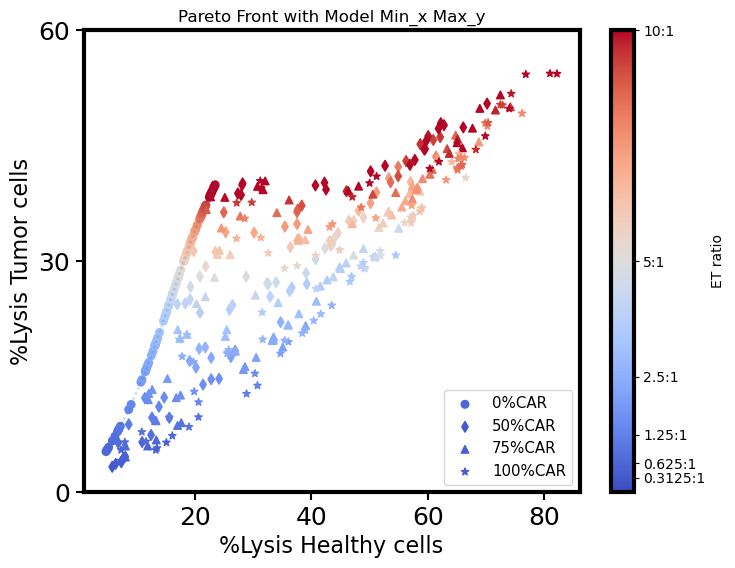

In [9]:
cmap = 'coolwarm'
norm = mcolors.Normalize(vmin=0.0, vmax=10.0)
fig,ax = plt.subplots(1,1,figsize = (8,6))
ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=18, length=6, width=1.5)
plt.rcParams['axes.linewidth'] = 3
markers = ['o','d','^','*']
colors = ['gray','darkcyan','blue','black']
labels = ['0%CAR','50%CAR','75%CAR','100% CAR']
ls = [(1,(1,1)),(5, (10, 3)), (0,(2,2)), (0, (3, 1, 1, 1))]
width = 2
ax.plot(df0['Healthy_Lysis'], df0['Tumor_lysis'],alpha=0.2,lw =width,ls = ls[0])
#ax.plot(df1['Healthy_Lysis'], df1['Tumor_lysis'],alpha=0.2,lw =width,ls = ls[1])
#ax.plot(df2['Healthy_Lysis'], df2['Tumor_lysis'],alpha=0.2,lw =width,ls = ls[2])
#ax.plot(df3['Healthy_Lysis'], df3['Tumor_lysis'],alpha=0.2,lw =width,ls = ls[3])
size = 30
#sc = ax.scatter(a,1/b,marker=markers[i-1],s=50,c = ET_ratio_num,cmap=cmap,norm=norm)
sc = ax.scatter(df0['Healthy_Lysis'], df0['Tumor_lysis'], marker='o', s = size, c=df0['ET_ratio'], cmap=cmap, norm=norm,label = '0%CAR')
sc = ax.scatter(df1['Healthy_Lysis'], df1['Tumor_lysis'], marker='d', s = size, c=df1['ET_ratio'], cmap=cmap, norm=norm,label = '50%CAR')
sc = ax.scatter(df2['Healthy_Lysis'], df2['Tumor_lysis'], marker='^', s = size, c=df2['ET_ratio'], cmap=cmap, norm=norm,label = '75%CAR')
sc = ax.scatter(df3['Healthy_Lysis'], df3['Tumor_lysis'], marker='*', s = size, c=df3['ET_ratio'], cmap=cmap, norm=norm,label = '100%CAR')
cbar = fig.colorbar(sc, label='ET ratio')
cbar.set_ticks(ET_ratio_num)  # Set the positions of the colorbar ticks
cbar.set_ticklabels(ET_ratio)
plt.xlabel('%Lysis Healthy cells',fontsize=16)
plt.ylabel('%Lysis Tumor cells',fontsize=16)
plt.yticks([0.0,30.0,60.0])
#ytick_labels = [r"$\frac{" + str(1) + "}{" + str(i) + "}$" for i in [round(i**-1, 1)  for i in plt.yticks()[0]]]
#plt.yticks(plt.yticks()[0], ytick_labels, fontsize =22)
plt.legend(fontsize=10.8,loc='lower right', bbox_to_anchor=(1.0, 0.0))
plt.title("Pareto Front with Model Min_x Max_y")
plt.savefig('Plot_Pareto_with_Model_Min_x_Max_y.png')
plt.show()

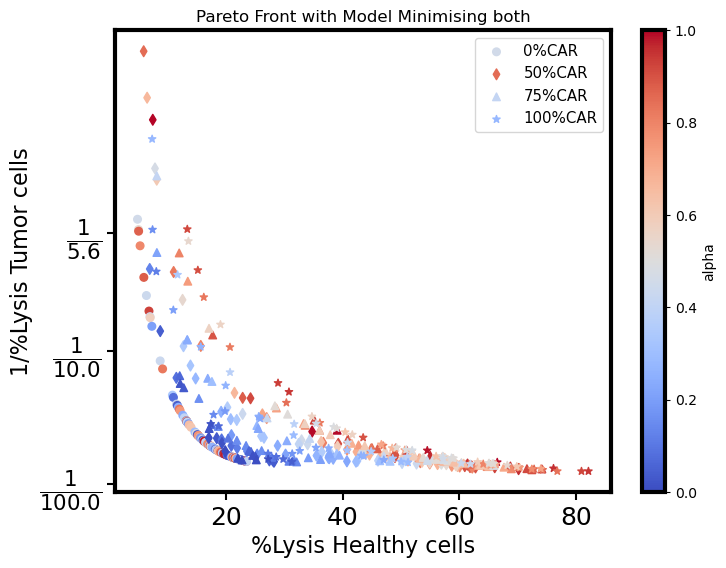

In [10]:
cmap = 'coolwarm'
norm = mcolors.Normalize(vmin=0.0, vmax=1.0)
fig,ax = plt.subplots(1,1,figsize = (8,6))
ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=18, length=6, width=1.5)
plt.rcParams['axes.linewidth'] = 3
markers = ['o','d','^','*']
colors = ['gray','darkcyan','blue','black']
labels = ['0%CAR','50%CAR','75%CAR','100% CAR']
ls = [(1,(1,1)),(5, (10, 3)), (0,(2,2)), (0, (3, 1, 1, 1))]
width = 2
#ax.plot(df0['Healthy_Lysis'], 1/df0['Tumor_lysis'],alpha=0.2,lw =width,ls = ls[0])
#ax.plot(df1['Healthy_Lysis'], 1/df1['Tumor_lysis'],alpha=0.2,lw =width,ls = ls[1])
#ax.plot(df2['Healthy_Lysis'], 1/df2['Tumor_lysis'],alpha=0.2,lw =width,ls = ls[2])
#ax.plot(df3['Healthy_Lysis'], 1/df3['Tumor_lysis'],alpha=0.2,lw =width,ls = ls[3])
size = 30
#sc = ax.scatter(a,1/b,marker=markers[i-1],s=50,c = ET_ratio_num,cmap=cmap,norm=norm)
sc = ax.scatter(df0['Healthy_Lysis'], 1/df0['Tumor_lysis'], marker='o', s = size, c=df0['alpha'], cmap=cmap, norm=norm,label = '0%CAR')
sc = ax.scatter(df1['Healthy_Lysis'], 1/df1['Tumor_lysis'], marker='d', s = size, c=df1['alpha'], cmap=cmap, norm=norm,label = '50%CAR')
sc = ax.scatter(df2['Healthy_Lysis'], 1/df2['Tumor_lysis'], marker='^', s = size, c=df2['alpha'], cmap=cmap, norm=norm,label = '75%CAR')
sc = ax.scatter(df3['Healthy_Lysis'], 1/df3['Tumor_lysis'], marker='*', s = size, c=df3['alpha'], cmap=cmap, norm=norm,label = '100%CAR')
cbar = fig.colorbar(sc, label='alpha')
#cbar.set_ticks(ET_ratio_num)  # Set the positions of the colorbar ticks
#cbar.set_ticklabels(ET_ratio)
plt.xlabel('%Lysis Healthy cells',fontsize=16)
plt.ylabel('1/%Lysis Tumor cells',fontsize=16)
plt.yticks([0.01,0.10,0.18])
ytick_labels = [r"$\frac{" + str(1) + "}{" + str(i) + "}$" for i in [round(i**-1, 1)  for i in plt.yticks()[0]]]
plt.yticks(plt.yticks()[0], ytick_labels, fontsize =22)
plt.legend(fontsize=10.8,loc='upper right', bbox_to_anchor=(1.0, 1.0))
plt.title("Pareto Front with Model Minimising both")
plt.savefig('Plot_Pareto_with_Model.png')
plt.show()